In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [26]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [28]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

RuntimeError: dictionary changed size during iteration

<AxesSubplot:>

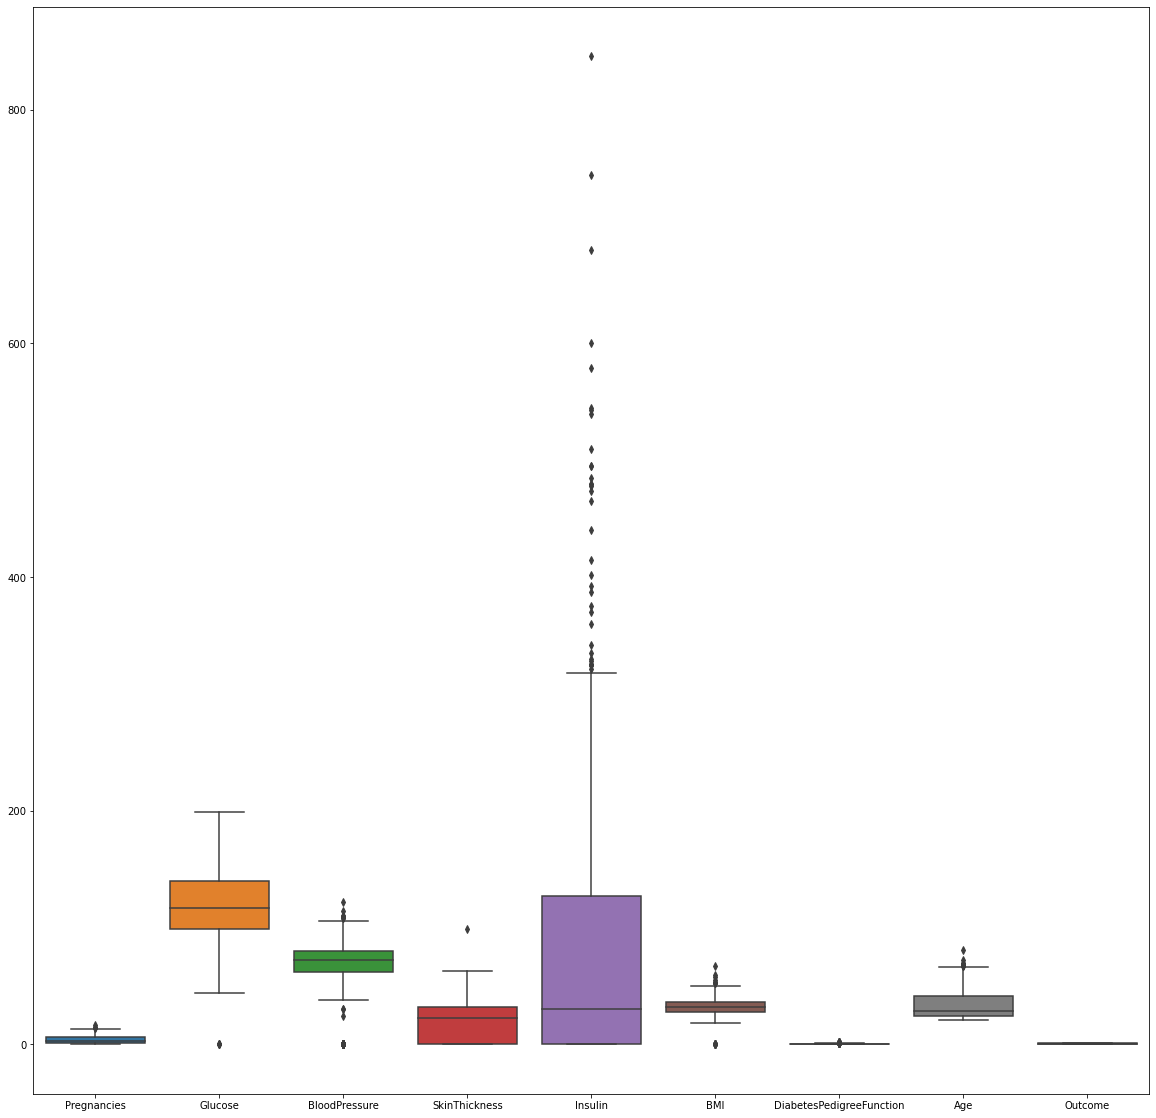

In [27]:
#To see outliers (zeroes in features when it should be there), can be replaced with mean
fig, ax= plt.subplots(figsize =(20,20))
sns.boxplot(data = df, ax=ax)

In [ ]:
# we can see 0's in some of the features where it should be there, like- bp, skin thickness, insulin etc

In [34]:
df['BloodPressure'][df['BloodPressure']>0].mean()        #this seems better as it will remove 0 from the data and then calculate the mean

72.40518417462484

In [35]:
df['BloodPressure'].mean()

69.10546875

In [5]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'][df['BloodPressure']>0].mean())

In [9]:
df['Insulin'][df['Insulin']>0].mean()

155.5482233502538

In [10]:
df['Insulin'].mean()

79.79947916666667

In [6]:
df['Insulin']= df['Insulin'].replace(0,df['Insulin'][df['Insulin']>0].mean())

In [12]:
df['Glucose'][df['Glucose']>0].mean()

121.6867627785059

In [7]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'][df['Glucose']>0].mean())

In [8]:
df['BMI'] = df['BMI'].replace(0,df['BMI'][df['BMI']>0].mean())

In [9]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'][df['SkinThickness']>0].mean())

In [41]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:02<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
q=df['Insulin'].quantile(.70)          # ------this comes----> 155.5482233502538 , returns the value of the 70th (percentile)quartile 
df_new = df[df['Insulin'] < q]          # we are taking only data below 70th(percentile) quartile, meaning from Q1 to Q70
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
6              3     78.0           50.0           32.0     88.0  31.0   
18             1    103.0           30.0           38.0     83.0  43.3   
19             1    115.0           70.0           30.0     96.0  34.6   
24            11    143.0           94.0           33.0    146.0  36.6   
..           ...      ...            ...            ...      ...   ...   
747            1     81.0           74.0           41.0     57.0  46.3   
751            1    121.0           78.0           39.0     74.0  39.0   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
6                       0.248   26        1  
18                      0.183   33        0  
19                      0.529   32        1  
24                      0.254   51        1  
..                        ...  ...      ...  
747                     1.096   32        0  
751                     0.261   28        0  
755                     1.057   37        1  
760                     0.766   22        0  
765                     0.245   30        0  

[247 rows x 9 columns]

In [17]:
q=df['Glucose'].quantile(.90)          
df_new1 = df[df['Glucose'] < q]       
df_new1

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
5              5    116.0           74.0       29.15342  155.548223  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
3                       0.167   21        0  
4                       2.288   33        1  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[689 rows x 9 columns]

<AxesSubplot:>

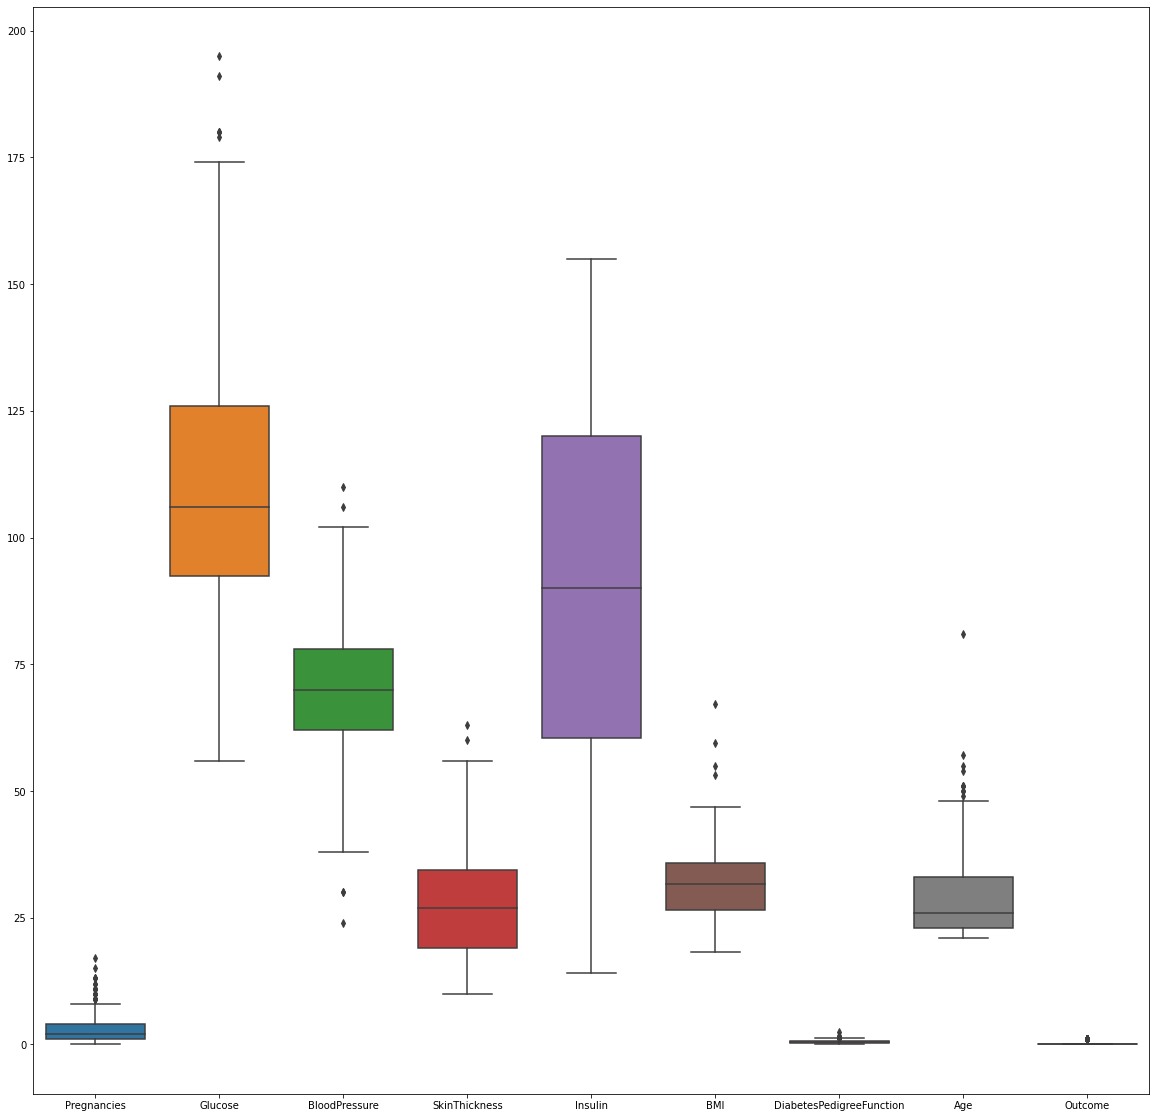

In [19]:
fig, ax= plt.subplots(figsize =(20,20))
sns.boxplot(data = df_new, ax=ax)

In [20]:
q=df['BloodPressure'].quantile(.70)     
df_new1 = df[df['BloodPressure'] < q]

q=df['BMI'].quantile(.70)     
df_new1 = df[df['BMI'] < q]

q=df['Age'].quantile(.70)     
df_new1 = df[df['Age'] < q]

<AxesSubplot:>

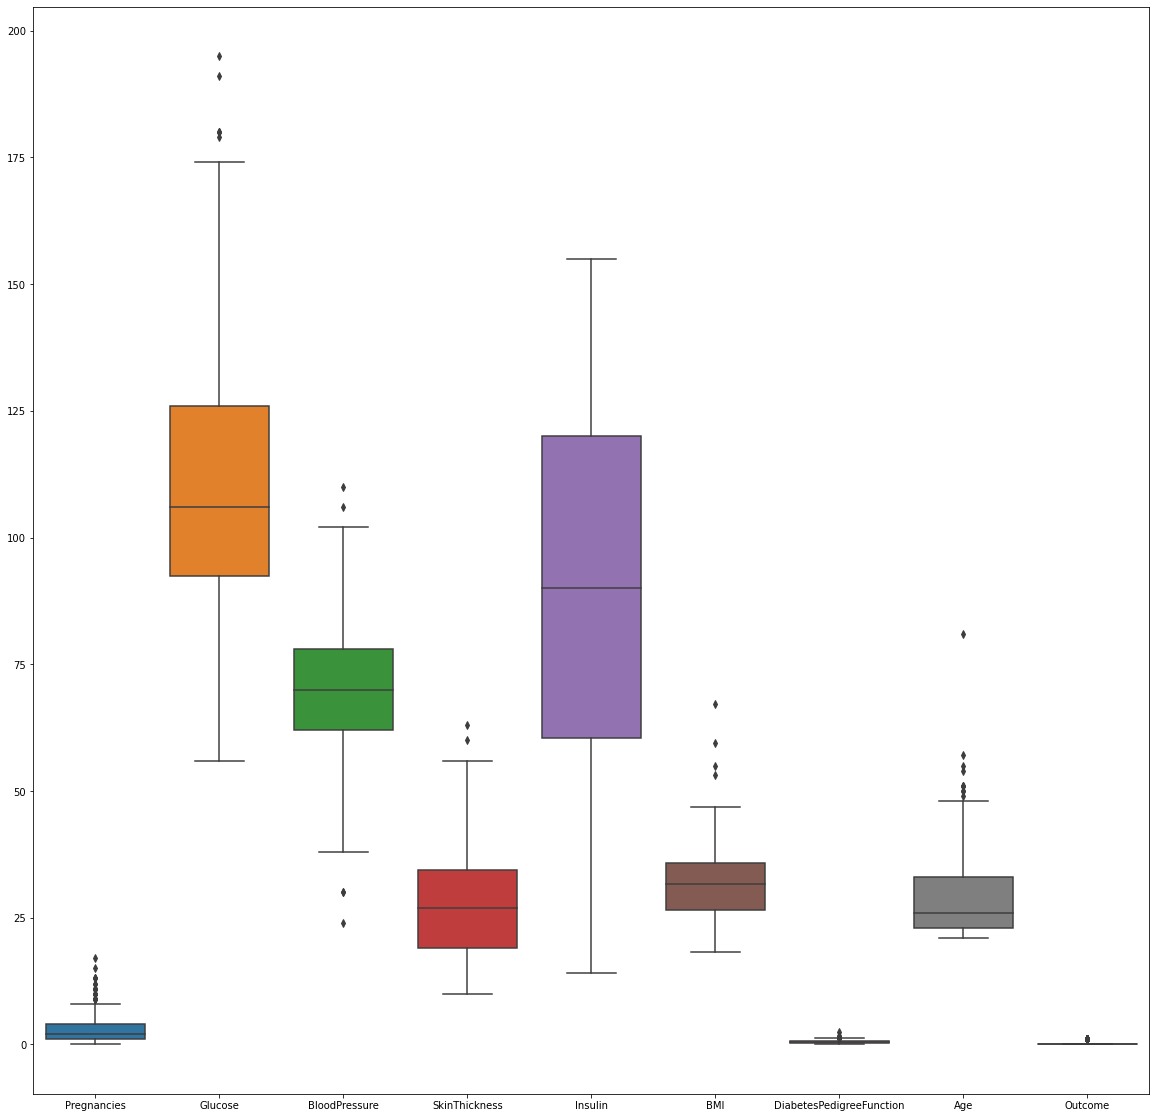

In [21]:
fig, ax= plt.subplots(figsize =(20,20))
sns.boxplot(data = df_new, ax=ax)

In [22]:
df_new        

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
6              3     78.0           50.0           32.0     88.0  31.0   
18             1    103.0           30.0           38.0     83.0  43.3   
19             1    115.0           70.0           30.0     96.0  34.6   
24            11    143.0           94.0           33.0    146.0  36.6   
..           ...      ...            ...            ...      ...   ...   
747            1     81.0           74.0           41.0     57.0  46.3   
751            1    121.0           78.0           39.0     74.0  39.0   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
6                       0.248   26        1  
18                      0.183   33        0  
19                      0.529   32        1  
24                      0.254   51        1  
..                        ...  ...      ...  
747                     1.096   32        0  
751                     0.261   28        0  
755                     1.057   37        1  
760                     0.766   22        0  
765                     0.245   30        0  

[247 rows x 9 columns]